# Lead Scoring Case Study

### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

## Importing Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)

In [3]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
#reading the dataset
df = pd.read_csv("Leads.csv")

## Inspecting the Dataframe

In [5]:
#checking the head of data
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
#checking the shape of dataset
df.shape

(9240, 37)

In [7]:
#checking the statistical aspects of the dataframe
df.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,NaN,NaN,1,2,16
top,ecac3d4f-45f5-4332-9630-86d3f04e547a,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


In [8]:
# checking the type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
# checking the null values in dataset
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
#checking the null value data percentage
round(100*(df.isnull().sum()/len(df)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

## Data preparation and cleaning

In [11]:
# deleting columns with null value percentage>30% 
for col in df.columns:
    if round(100*(df[col].isnull().sum()/len(df)), 2)>30:
        df.drop(col,1,inplace=True)

In [12]:
round(100*(df.isnull().sum()/len(df)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

The city and Country column seems to be not so important as data is skewed and there are lots of missing values.

In [13]:
df.drop(['City'],axis=1,inplace=True)

In [14]:
df.drop(['Country'],axis=1,inplace=True)

In [15]:
# checking the percentage of null values
round(100*(df.isnull().sum()/len(df)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [16]:
# checking for unique value details
for col in df.columns:
    print(df[col].astype('category').value_counts())

fffb0e5e-9f92-4017-9f42-781a69da4154    1
56453aec-3f7b-4f30-870c-8f966d393100    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
                                       ..
aa4180a5-84f1-4e67-8d90-0c8403070a59    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
Name: Prospect ID, Length: 9240, dtype: int64
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference         

In [17]:
# unique value data in 'What matters most to you in choosing a course'
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [18]:
# unique value data in 'Specialization'
df['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [19]:
# unique value data in How did you hear about X Education
df['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [20]:
# unique value data in What is your current occupation
df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [21]:
# unique value data in Lead Profile
df['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

There are a lot of select values in Lead Profile and How did you hear about X Education which is similar to null value so those columns can be dropped.

In [22]:
df.drop(['Lead Profile','How did you hear about X Education'],axis=1,inplace=True)

In [23]:
# checking column info
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

While checking value count of columns it was seen that columns like 'Do Not Call','Search', 'Magazine','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','Receive More Updates About Our Courses',      'Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque','What matters most to you in choosing a course' had one value which was mojorly present. So it's better to drop such columns as they are of no use for the analysis.

In [24]:
df.drop(['Do Not Call','Search', 'Magazine','Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque','What matters most to you in choosing a course'],axis=1,inplace=True)

In [25]:
# cheching null value percentage
round(100*(df.isnull().sum()/len(df)), 2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                            15.56
What is your current occupation           29.11
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [26]:
# dropping rows with null value in the column 'What is your current occupation'
df=df[~pd.isnull(df['What is your current occupation'])]

In [27]:
round(100*(df.isnull().sum()/len(df)), 2)

Prospect ID                               0.00
Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.55
Do Not Email                              0.00
Converted                                 0.00
TotalVisits                               1.98
Total Time Spent on Website               0.00
Page Views Per Visit                      1.98
Last Activity                             1.57
Specialization                            0.27
What is your current occupation           0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [28]:
# dropping rows with null value in the column 'TotalVisits'
df=df[~pd.isnull(df['TotalVisits'])]

In [29]:
round(100*(df.isnull().sum()/len(df)), 2)

Prospect ID                               0.00
Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.45
Do Not Email                              0.00
Converted                                 0.00
TotalVisits                               0.00
Total Time Spent on Website               0.00
Page Views Per Visit                      0.00
Last Activity                             0.00
Specialization                            0.28
What is your current occupation           0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [30]:
# dropping rows with null value in the column 'Lead Source'
df=df[~pd.isnull(df['Lead Source'])]

In [31]:
# dropping rows with null value in the column 'Specialization'
df=df[~pd.isnull(df['Specialization'])]

In [32]:
round(100*(df.isnull().sum()/len(df)), 2)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [33]:
#checking the percentage of data retained after cleaning
len(df)/9240

0.6897186147186147

In [34]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [35]:
# dropping the columns 'Prospect ID','Lead Number' as they are of no use to the analysis
df.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

In [36]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

## EDA

### Univariate Analysis

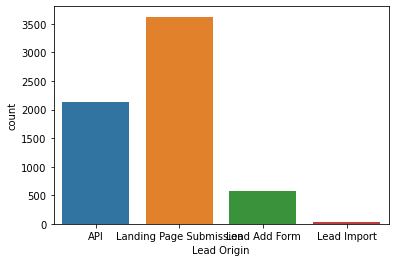

In [37]:
sns.countplot(df['Lead Origin'])
plt.show()

Landing Page Submission is the highest rated origin identifier with which the customer was identified to be a lead.

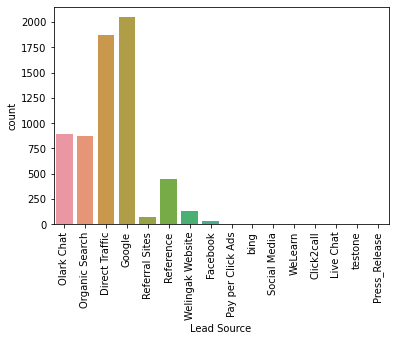

In [38]:
sns.countplot(df['Lead Source'])
plt.xticks(rotation=90) 
plt.show()

The top three lead sources are Google, Direct Traffic and Olark Chat

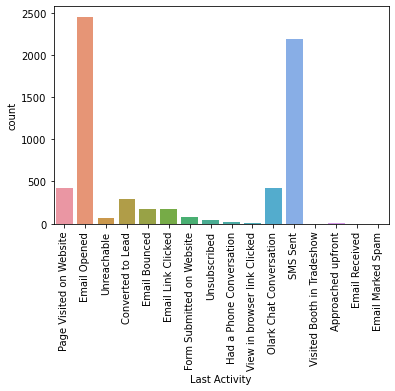

In [39]:
sns.countplot(df['Last Activity'])
plt.xticks(rotation=90) 
plt.show()

Email opened and SMS sent are the activities which were mostly performed by the customers.

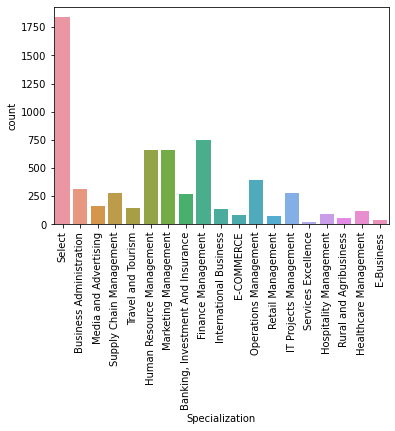

In [40]:
sns.countplot(df['Specialization'])
plt.xticks(rotation=90) 
plt.show()

Specialisations of most of the customers are missing but its an important data

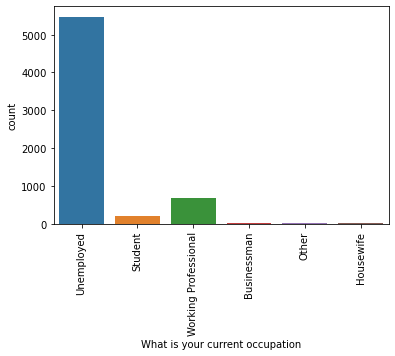

In [41]:
sns.countplot(df['What is your current occupation'])
plt.xticks(rotation=90) 
plt.show()

It can be seen that mostly unemployed people are searching for such online courses

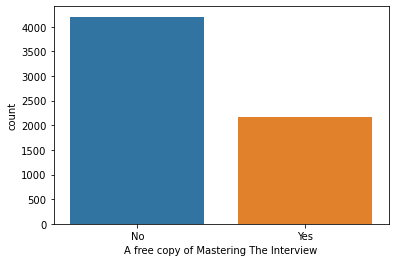

In [42]:
sns.countplot(df['A free copy of Mastering The Interview'])
plt.show()

Graph shows that most of the customers do not want a free copy of 'Mastering the Interview'

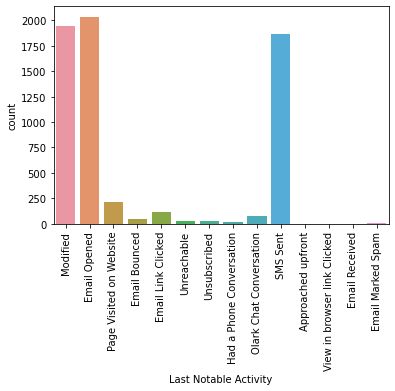

In [43]:
sns.countplot(df['Last Notable Activity'])
plt.xticks(rotation=90) 
plt.show()

The last notable acitivity mostly performed by the students are sending sms, opening email and modifying.

### Bivariate Analysis

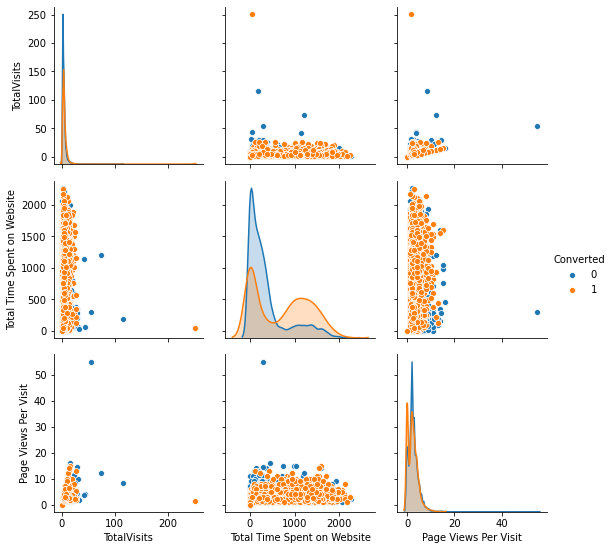

In [44]:
sns.pairplot(df,hue='Converted')
plt.show()

The time spent on website is more but the total visits and page viewed per visit are less.
Clusters can be seen in the total time spent on website data 
There are groupd of customers who use website for long period and short period

In [45]:
# checking object columns for dummy variable creation
df.select_dtypes('object').columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [46]:
# creating dummies
dummy=pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity']],drop_first=True)

In [47]:
# concating the dataframes
df=pd.concat([df,dummy],axis=1)

In [48]:
#creating dummy variable for specialization explicitly since it has value select which needs to be removed
dummy1= pd.get_dummies(df['Specialization'],prefix='Specialization')
dummy1= dummy1.drop(['Specialization_Select'],1)
df=pd.concat([df,dummy1],axis=1)

In [49]:
# dropping the variables for which dummy variables have been created
df=df.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'What is your current occupation','Specialization',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],axis=1)

In [50]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,...,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Test-Train Split

In [51]:
# Putting feature variable to X
X=df.drop(['Converted'],axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,...,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
# Putting response variable to y
y=df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [53]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [54]:
#from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()

X_train[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,...,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.064874,-0.824395,-0.223652,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
218,0.064874,-0.611929,0.753710,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4171,0.431907,-0.804919,1.731071,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4037,-0.669191,-0.943022,-1.201013,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3660,-0.669191,-0.943022,-1.201013,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


### Looking at Correlations

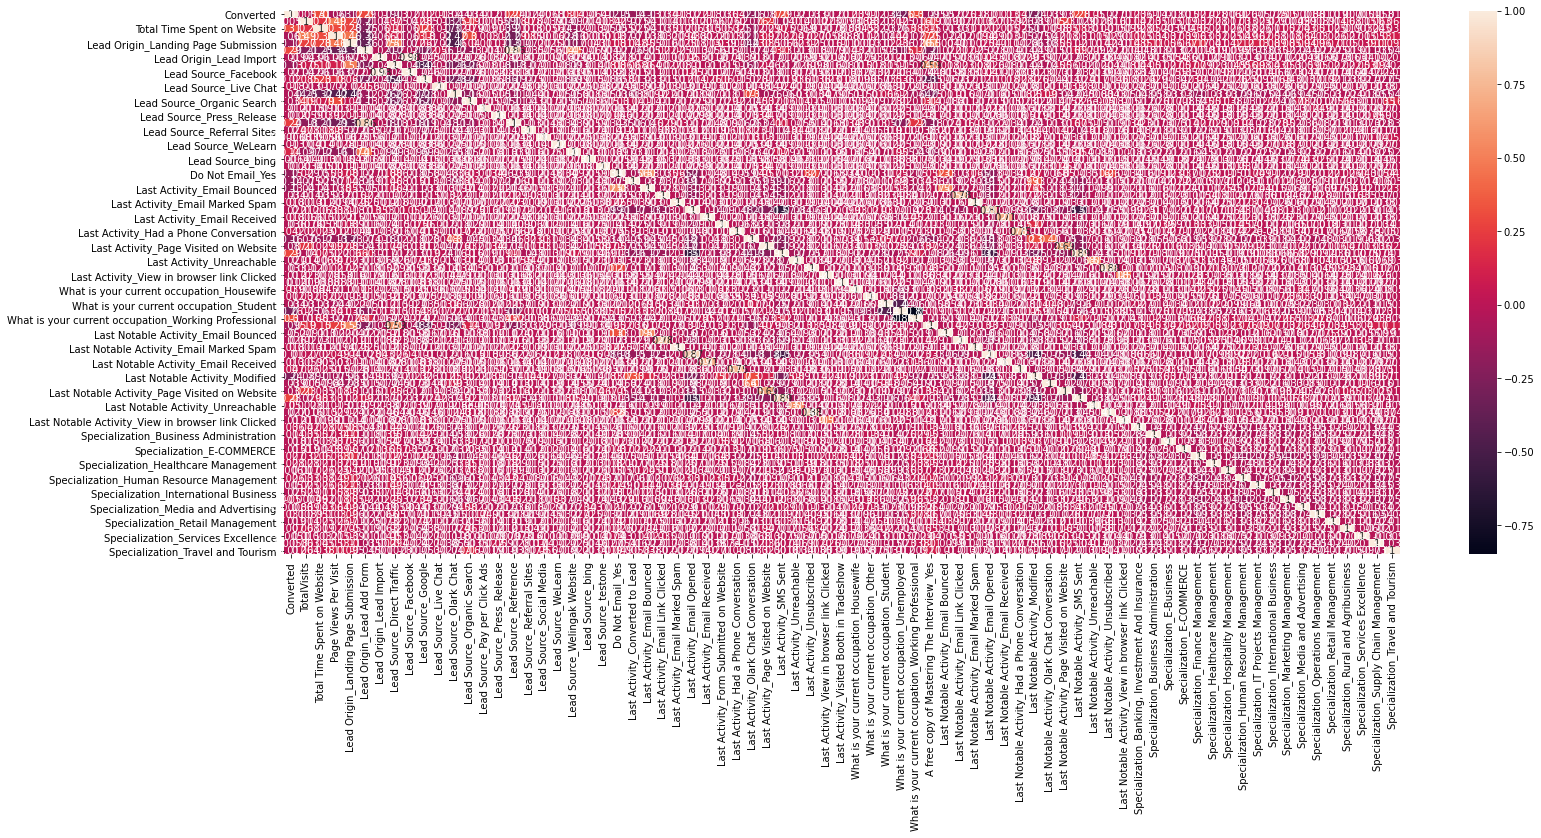

In [56]:
# Let's see the correlation matrix 
plt.figure(figsize = (25,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

## Model Building

### Feature Selection Using RFE

In [57]:
logreg = LogisticRegression()
rfe = RFE(logreg, 20)            
rfe = rfe.fit(X_train, y_train)

In [58]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 34),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 36),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 51),
 ('Lead Source_Direct Traffic', False, 20),
 ('Lead Source_Facebook', False, 48),
 ('Lead Source_Google', False, 24),
 ('Lead Source_Live Chat', False, 40),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 23),
 ('Lead Source_Pay per Click Ads', False, 37),
 ('Lead Source_Press_Release', False, 50),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 25),
 ('Lead Source_Social Media', False, 55),
 ('Lead Source_WeLearn', False, 33),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 22),
 ('Lead Source_testone', False, 32),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 17),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link 

In [59]:
col = X_train.columns[rfe.support_]

In [60]:
X_train=X_train[col]

##### Assessing the model with StatsModels

In [61]:
# model 1
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4440
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2026.0
Date:                Mon, 11 Jan 2021   Deviance:                       4052.1
Time:                        23:06:50   Pearson chi2:                 4.69e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6088      0.601      1.013      0.311      -0.569       1.787
Total Time Spent on Website                              1.0955      0.046     23.656      0.000       1.005       1.186
Lead Origin_Lead Add Form                                2.7964      1.209      2.312      0.021       0.426       5.167
Lead Source_Olark Chat                                   1.4083      0.119     11.878      0.000       1.176       1.641
Lead Source_Reference                                    1.2566      1.233      1.019      0.308      -1.160       3.674
Lead Source_Welingak Website                             3.3038      1.573      2.101      0.036       0.221       6.386
Do Not Email_Yes                                        -1.3520      0.222     -6.101      0.000      -1.786      -0.918
Last Activity_Email Bounced                             -1.1647      0.660     -1.764      0.078      -2.459       0.130
Last Activity_Had a Phone Conversation                   1.5363      0.985      1.560      0.119      -0.394       3.466
Last Activity_Olark Chat Conversation                   -0.6283      0.191     -3.298      0.001      -1.002      -0.255
Last Activity_SMS Sent                                   0.9486      0.086     11.069      0.000       0.781       1.117
What is your current occupation_Housewife               22.4239    2.4e+04      0.001      0.999   -4.71e+04    4.71e+04
What is your current occupation_Student                 -1.2909      0.641     -2.015      0.044      -2.546      -0.035
What is your current occupation_Unemployed              -1.4306      0.602     -2.375      0.018      -2.611      -0.250
What is your current occupation_Working Professional     1.1760      0.632      1.862      0.063      -0.062       2.414
Last Notable Activity_Email Bounced                      1.4274      0.796      1.793      0.073      -0.133       2.988
Last Notable Activity_Had a Phone Conversation          22.4007   2.11e+04      0.001      0.999   -4.14e+04    4.14e+04
Last Notable Activity_Modified                          -0.7321      0.094     -7.783      0.000      -0.917      -0.548
Last Notable Activity_Unreachable                        2.4849      0.807      3.077      0.002       0.902       4.068
Specialization_Banking, Investment And Insurance         0.5729      0.203      2.818      0.005       0.174       0.971
Specialization_Rural and Agribusiness                    0.5364      0.417      1.288      0.198      -0.280       1.353
========================================================================================================================
"""

In [62]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,84.17
3,Lead Source_Reference,65.21
4,Lead Source_Welingak Website,20.03
12,What is your current occupation_Unemployed,2.50
7,Last Activity_Had a Phone Conversation,2.45
15,Last Notable Activity_Had a Phone Conversation,2.45
6,Last Activity_Email Bounced,2.01
16,Last Notable Activity_Modified,1.76
9,Last Activity_SMS Sent,1.73
5,Do Not Email_Yes,1.65


Drop the column What is your current occupation_Housewife since p value is high

In [63]:
X_train.drop('What is your current occupation_Housewife',axis=1,inplace=True)

In [64]:
# Model 2
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4441
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2028.1
Date:                Mon, 11 Jan 2021   Deviance:                       4056.1
Time:                        23:06:51   Pearson chi2:                 4.69e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1320      0.552      2.050      0.040       0.050       2.214
Total Time Spent on Website                              1.0951      0.046     23.653      0.000       1.004       1.186
Lead Origin_Lead Add Form                                2.7955      1.209      2.312      0.021       0.425       5.166
Lead Source_Olark Chat                                   1.4068      0.119     11.865      0.000       1.174       1.639
Lead Source_Reference                                    1.2576      1.233      1.020      0.308      -1.159       3.674
Lead Source_Welingak Website                             3.3046      1.573      2.101      0.036       0.222       6.387
Do Not Email_Yes                                        -1.3570      0.222     -6.114      0.000      -1.792      -0.922
Last Activity_Email Bounced                             -1.1616      0.660     -1.759      0.079      -2.456       0.133
Last Activity_Had a Phone Conversation                   1.5351      0.985      1.559      0.119      -0.395       3.465
Last Activity_Olark Chat Conversation                   -0.6286      0.191     -3.300      0.001      -1.002      -0.255
Last Activity_SMS Sent                                   0.9489      0.086     11.074      0.000       0.781       1.117
What is your current occupation_Student                 -1.8140      0.595     -3.049      0.002      -2.980      -0.648
What is your current occupation_Unemployed              -1.9538      0.554     -3.529      0.000      -3.039      -0.869
What is your current occupation_Working Professional     0.6527      0.585      1.115      0.265      -0.494       1.800
Last Notable Activity_Email Bounced                      1.4297      0.796      1.796      0.073      -0.131       2.990
Last Notable Activity_Had a Phone Conversation          21.4019   1.28e+04      0.002      0.999   -2.51e+04    2.51e+04
Last Notable Activity_Modified                          -0.7308      0.094     -7.776      0.000      -0.915      -0.547
Last Notable Activity_Unreachable                        2.4833      0.808      3.074      0.002       0.900       4.066
Specialization_Banking, Investment And Insurance         0.5727      0.203      2.817      0.005       0.174       0.971
Specialization_Rural and Agribusiness                    0.5366      0.417      1.288      0.198      -0.280       1.353
========================================================================================================================
"""

In [65]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,84.17
3,Lead Source_Reference,65.20
4,Lead Source_Welingak Website,20.03
11,What is your current occupation_Unemployed,2.50
14,Last Notable Activity_Had a Phone Conversation,2.45
7,Last Activity_Had a Phone Conversation,2.45
6,Last Activity_Email Bounced,2.01
15,Last Notable Activity_Modified,1.76
9,Last Activity_SMS Sent,1.73
5,Do Not Email_Yes,1.65


Drop th ecolumn Last Notable Activity_Had a Phone Conversation as p value is high

In [66]:
X_train.drop('Last Notable Activity_Had a Phone Conversation',axis=1,inplace=True)

In [67]:
# Model 3
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4442
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2029.9
Date:                Mon, 11 Jan 2021   Deviance:                       4059.8
Time:                        23:06:52   Pearson chi2:                 4.69e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1358      0.552      2.057      0.040       0.054       2.218
Total Time Spent on Website                              1.0939      0.046     23.634      0.000       1.003       1.185
Lead Origin_Lead Add Form                                2.7960      1.210      2.311      0.021       0.425       5.167
Lead Source_Olark Chat                                   1.4054      0.119     11.853      0.000       1.173       1.638
Lead Source_Reference                                    1.2574      1.234      1.019      0.308      -1.160       3.675
Lead Source_Welingak Website                             3.3037      1.573      2.100      0.036       0.221       6.387
Do Not Email_Yes                                        -1.3572      0.222     -6.115      0.000      -1.792      -0.922
Last Activity_Email Bounced                             -1.1542      0.660     -1.748      0.080      -2.448       0.140
Last Activity_Had a Phone Conversation                   2.7456      0.797      3.443      0.001       1.183       4.309
Last Activity_Olark Chat Conversation                   -0.6234      0.191     -3.272      0.001      -0.997      -0.250
Last Activity_SMS Sent                                   0.9474      0.086     11.058      0.000       0.780       1.115
What is your current occupation_Student                 -1.8163      0.595     -3.052      0.002      -2.983      -0.650
What is your current occupation_Unemployed              -1.9550      0.554     -3.531      0.000      -3.040      -0.870
What is your current occupation_Working Professional     0.6506      0.585      1.112      0.266      -0.496       1.798
Last Notable Activity_Email Bounced                      1.4205      0.796      1.785      0.074      -0.139       2.980
Last Notable Activity_Modified                          -0.7404      0.094     -7.887      0.000      -0.924      -0.556
Last Notable Activity_Unreachable                        2.4804      0.808      3.071      0.002       0.897       4.063
Specialization_Banking, Investment And Insurance         0.5873      0.202      2.902      0.004       0.191       0.984
Specialization_Rural and Agribusiness                    0.5364      0.416      1.288      0.198      -0.280       1.353
========================================================================================================================
"""

In [68]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,84.17
3,Lead Source_Reference,65.20
4,Lead Source_Welingak Website,20.03
11,What is your current occupation_Unemployed,2.50
6,Last Activity_Email Bounced,2.01
14,Last Notable Activity_Modified,1.75
9,Last Activity_SMS Sent,1.73
5,Do Not Email_Yes,1.65
2,Lead Source_Olark Chat,1.47
13,Last Notable Activity_Email Bounced,1.41


Drop the column Lead Source_Reference as p value is high

In [69]:
X_train.drop('Lead Source_Reference',axis=1,inplace=True)

In [70]:
# Model 4
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4443
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2030.4
Date:                Mon, 11 Jan 2021   Deviance:                       4060.7
Time:                        23:06:53   Pearson chi2:                 4.68e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1364      0.552      2.059      0.040       0.055       2.218
Total Time Spent on Website                              1.0939      0.046     23.632      0.000       1.003       1.185
Lead Origin_Lead Add Form                                4.0151      0.256     15.703      0.000       3.514       4.516
Lead Source_Olark Chat                                   1.4053      0.119     11.851      0.000       1.173       1.638
Lead Source_Welingak Website                             2.0844      1.037      2.010      0.044       0.052       4.117
Do Not Email_Yes                                        -1.3550      0.222     -6.111      0.000      -1.790      -0.920
Last Activity_Email Bounced                             -1.1558      0.660     -1.750      0.080      -2.450       0.139
Last Activity_Had a Phone Conversation                   2.7457      0.798      3.443      0.001       1.183       4.309
Last Activity_Olark Chat Conversation                   -0.6229      0.190     -3.270      0.001      -0.996      -0.250
Last Activity_SMS Sent                                   0.9476      0.086     11.060      0.000       0.780       1.115
What is your current occupation_Student                 -1.8160      0.595     -3.053      0.002      -2.982      -0.650
What is your current occupation_Unemployed              -1.9559      0.554     -3.534      0.000      -3.041      -0.871
What is your current occupation_Working Professional     0.6509      0.585      1.112      0.266      -0.496       1.798
Last Notable Activity_Email Bounced                      1.4200      0.796      1.784      0.074      -0.140       2.980
Last Notable Activity_Modified                          -0.7406      0.094     -7.890      0.000      -0.925      -0.557
Last Notable Activity_Unreachable                        2.4809      0.808      3.072      0.002       0.898       4.064
Specialization_Banking, Investment And Insurance         0.5880      0.202      2.906      0.004       0.191       0.985
Specialization_Rural and Agribusiness                    0.5363      0.416      1.288      0.198      -0.280       1.353
========================================================================================================================
"""

In [71]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,2.50
5,Last Activity_Email Bounced,2.01
13,Last Notable Activity_Modified,1.75
8,Last Activity_SMS Sent,1.73
4,Do Not Email_Yes,1.65
1,Lead Origin_Lead Add Form,1.65
2,Lead Source_Olark Chat,1.46
12,Last Notable Activity_Email Bounced,1.41
3,Lead Source_Welingak Website,1.33
11,What is your current occupation_Working Profes...,1.32


Drop the column What is your current occupation_Working Professional as p value is high

In [72]:
X_train.drop('What is your current occupation_Working Professional',axis=1,inplace=True)

In [73]:
# Model 5
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4444
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2030.9
Date:                Mon, 11 Jan 2021   Deviance:                       4061.9
Time:                        23:06:54   Pearson chi2:                 4.65e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                1.7221      0.189      9.115      0.000       1.352       2.092
Total Time Spent on Website                          1.0940      0.046     23.631      0.000       1.003       1.185
Lead Origin_Lead Add Form                            4.0170      0.256     15.712      0.000       3.516       4.518
Lead Source_Olark Chat                               1.4064      0.119     11.861      0.000       1.174       1.639
Lead Source_Welingak Website                         2.0828      1.037      2.009      0.045       0.050       4.115
Do Not Email_Yes                                    -1.3564      0.222     -6.115      0.000      -1.791      -0.922
Last Activity_Email Bounced                         -1.1416      0.659     -1.734      0.083      -2.432       0.149
Last Activity_Had a Phone Conversation               2.7486      0.797      3.447      0.001       1.186       4.311
Last Activity_Olark Chat Conversation               -0.6192      0.190     -3.254      0.001      -0.992      -0.246
Last Activity_SMS Sent                               0.9513      0.086     11.119      0.000       0.784       1.119
What is your current occupation_Student             -2.4032      0.289     -8.325      0.000      -2.969      -1.837
What is your current occupation_Unemployed          -2.5432      0.189    -13.474      0.000      -2.913      -2.173
Last Notable Activity_Email Bounced                  1.4148      0.794      1.782      0.075      -0.141       2.971
Last Notable Activity_Modified                      -0.7412      0.094     -7.895      0.000      -0.925      -0.557
Last Notable Activity_Unreachable                    2.4826      0.808      3.074      0.002       0.900       4.066
Specialization_Banking, Investment And Insurance     0.5895      0.202      2.914      0.004       0.193       0.986
Specialization_Rural and Agribusiness                0.5404      0.416      1.299      0.194      -0.275       1.356
====================================================================================================================
"""

In [74]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,2.24
5,Last Activity_Email Bounced,2.01
12,Last Notable Activity_Modified,1.68
4,Do Not Email_Yes,1.65
8,Last Activity_SMS Sent,1.57
1,Lead Origin_Lead Add Form,1.51
2,Lead Source_Olark Chat,1.44
11,Last Notable Activity_Email Bounced,1.41
3,Lead Source_Welingak Website,1.30
7,Last Activity_Olark Chat Conversation,1.30


Drop the column Last Activity_Email Bounced as p value is high

In [75]:
X_train.drop('Last Activity_Email Bounced',axis=1,inplace=True)

In [76]:
# Model 6
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2032.8
Date:                Mon, 11 Jan 2021   Deviance:                       4065.6
Time:                        23:06:54   Pearson chi2:                 4.64e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                1.7172      0.188      9.121      0.000       1.348       2.086
Total Time Spent on Website                          1.0938      0.046     23.642      0.000       1.003       1.184
Lead Origin_Lead Add Form                            4.0326      0.256     15.755      0.000       3.531       4.534
Lead Source_Olark Chat                               1.4004      0.118     11.822      0.000       1.168       1.633
Lead Source_Welingak Website                         2.0884      1.037      2.013      0.044       0.055       4.122
Do Not Email_Yes                                    -1.4994      0.209     -7.158      0.000      -1.910      -1.089
Last Activity_Had a Phone Conversation               2.7590      0.798      3.459      0.001       1.196       4.322
Last Activity_Olark Chat Conversation               -0.5968      0.190     -3.140      0.002      -0.969      -0.224
Last Activity_SMS Sent                               0.9641      0.085     11.289      0.000       0.797       1.131
What is your current occupation_Student             -2.3991      0.288     -8.324      0.000      -2.964      -1.834
What is your current occupation_Unemployed          -2.5379      0.188    -13.497      0.000      -2.906      -2.169
Last Notable Activity_Email Bounced                  0.4172      0.518      0.806      0.420      -0.598       1.432
Last Notable Activity_Modified                      -0.7656      0.093     -8.219      0.000      -0.948      -0.583
Last Notable Activity_Unreachable                    2.4825      0.808      3.074      0.002       0.900       4.065
Specialization_Banking, Investment And Insurance     0.5897      0.202      2.914      0.004       0.193       0.986
Specialization_Rural and Agribusiness                0.5509      0.416      1.324      0.185      -0.264       1.366
====================================================================================================================
"""

In [77]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,2.24
11,Last Notable Activity_Modified,1.62
7,Last Activity_SMS Sent,1.55
1,Lead Origin_Lead Add Form,1.51
2,Lead Source_Olark Chat,1.43
3,Lead Source_Welingak Website,1.30
6,Last Activity_Olark Chat Conversation,1.29
0,Total Time Spent on Website,1.24
4,Do Not Email_Yes,1.23
10,Last Notable Activity_Email Bounced,1.14


Drop the column Last Notable Activity_Email Bounced as p value is high

In [78]:
X_train.drop('Last Notable Activity_Email Bounced',axis=1,inplace=True)

In [79]:
# Model 7
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2033.1
Date:                Mon, 11 Jan 2021   Deviance:                       4066.3
Time:                        23:06:55   Pearson chi2:                 4.64e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                1.7221      0.188      9.142      0.000       1.353       2.091
Total Time Spent on Website                          1.0939      0.046     23.648      0.000       1.003       1.185
Lead Origin_Lead Add Form                            4.0287      0.256     15.749      0.000       3.527       4.530
Lead Source_Olark Chat                               1.4018      0.118     11.835      0.000       1.170       1.634
Lead Source_Welingak Website                         2.0838      1.037      2.009      0.045       0.051       4.117
Do Not Email_Yes                                    -1.4377      0.193     -7.459      0.000      -1.815      -1.060
Last Activity_Had a Phone Conversation               2.7582      0.798      3.458      0.001       1.195       4.322
Last Activity_Olark Chat Conversation               -0.5975      0.190     -3.143      0.002      -0.970      -0.225
Last Activity_SMS Sent                               0.9576      0.085     11.270      0.000       0.791       1.124
What is your current occupation_Student             -2.4013      0.288     -8.328      0.000      -2.966      -1.836
What is your current occupation_Unemployed          -2.5396      0.188    -13.493      0.000      -2.908      -2.171
Last Notable Activity_Modified                      -0.7703      0.093     -8.289      0.000      -0.952      -0.588
Last Notable Activity_Unreachable                    2.4792      0.808      3.070      0.002       0.896       4.062
Specialization_Banking, Investment And Insurance     0.5878      0.202      2.908      0.004       0.192       0.984
Specialization_Rural and Agribusiness                0.5542      0.417      1.331      0.183      -0.262       1.371
====================================================================================================================
"""

In [80]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,2.23
10,Last Notable Activity_Modified,1.61
7,Last Activity_SMS Sent,1.54
1,Lead Origin_Lead Add Form,1.51
2,Lead Source_Olark Chat,1.43
3,Lead Source_Welingak Website,1.30
6,Last Activity_Olark Chat Conversation,1.29
0,Total Time Spent on Website,1.24
4,Do Not Email_Yes,1.09
8,What is your current occupation_Student,1.05


Drop the column Specialization_Rural and Agribusiness as p value is high

In [81]:
X_train.drop('Specialization_Rural and Agribusiness',axis=1,inplace=True)

In [82]:
# Model 8
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2034.0
Date:                Mon, 11 Jan 2021   Deviance:                       4068.0
Time:                        23:06:56   Pearson chi2:                 4.63e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                1.7308      0.188      9.195      0.000       1.362       2.100
Total Time Spent on Website                          1.0934      0.046     23.650      0.000       1.003       1.184
Lead Origin_Lead Add Form                            4.0223      0.256     15.729      0.000       3.521       4.524
Lead Source_Olark Chat                               1.3981      0.118     11.811      0.000       1.166       1.630
Lead Source_Welingak Website                         2.0842      1.037      2.009      0.045       0.051       4.117
Do Not Email_Yes                                    -1.4310      0.193     -7.429      0.000      -1.809      -1.053
Last Activity_Had a Phone Conversation               2.7524      0.798      3.451      0.001       1.189       4.316
Last Activity_Olark Chat Conversation               -0.6015      0.190     -3.165      0.002      -0.974      -0.229
Last Activity_SMS Sent                               0.9528      0.085     11.229      0.000       0.787       1.119
What is your current occupation_Student             -2.3873      0.288     -8.292      0.000      -2.952      -1.823
What is your current occupation_Unemployed          -2.5409      0.188    -13.505      0.000      -2.910      -2.172
Last Notable Activity_Modified                      -0.7719      0.093     -8.312      0.000      -0.954      -0.590
Last Notable Activity_Unreachable                    2.4720      0.808      3.061      0.002       0.889       4.055
Specialization_Banking, Investment And Insurance     0.5825      0.202      2.883      0.004       0.186       0.979
====================================================================================================================
"""

In [83]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,2.22
10,Last Notable Activity_Modified,1.61
7,Last Activity_SMS Sent,1.54
1,Lead Origin_Lead Add Form,1.51
2,Lead Source_Olark Chat,1.43
3,Lead Source_Welingak Website,1.30
6,Last Activity_Olark Chat Conversation,1.29
0,Total Time Spent on Website,1.24
4,Do Not Email_Yes,1.09
8,What is your current occupation_Student,1.05


In [84]:
col = X_train.columns
col.shape

(13,)

In [85]:
# Getting the predicted values on the train set
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

8003    0.318924
218     0.095248
4171    0.078552
4037    0.390982
3660    0.958269
207     0.127847
2044    0.130679
6411    0.918430
6498    0.055945
2085    0.986146
dtype: float64

In [86]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.31892434, 0.09524836, 0.07855192, 0.39098171, 0.95826916,
       0.1278468 , 0.13067933, 0.91843011, 0.05594505, 0.98614599])

In [87]:
# naming the predicted value column as Conversion_Prob and creating a new column Lead_Score indicating percentage
#probability of conversion
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Lead_Score'] = y_train_pred_final.Conversion_Prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_Score
0,0,0.318924,32
1,0,0.095248,10
2,1,0.078552,8
3,1,0.390982,39
4,1,0.958269,96


In [88]:
# making prediction based on a cut off of 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_Score,Predicted
0,0,0.318924,32,0
1,0,0.095248,10,0
2,1,0.078552,8,0
3,1,0.390982,39,0
4,1,0.958269,96,1


In [89]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1928  384]
 [ 564 1585]]


In [90]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7874915938130465


## Metrics beyond simply accuracy

In [91]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [92]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7375523499302001

In [93]:
# Let us calculate specificity
TN / float(TN+FP)

0.8339100346020761

In [94]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.16608996539792387


In [95]:
# positive predictive value 
print (TP / float(TP+FP))

0.8049771457592687


In [96]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7736757624398074


## Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [97]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [98]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

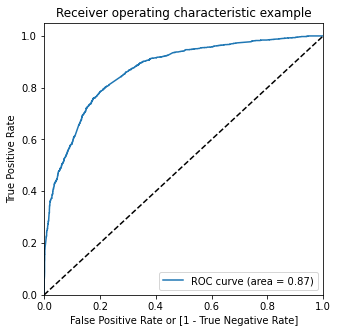

In [99]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under ROC curve is 0.87 which shows that the model is good.

## Finding Optimal Cutoff Point

In [100]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_Score,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.318924,32,0,1,1,1,1,0,0,0,0,0,0
1,0,0.095248,10,0,1,0,0,0,0,0,0,0,0,0
2,1,0.078552,8,0,1,0,0,0,0,0,0,0,0,0
3,1,0.390982,39,0,1,1,1,1,0,0,0,0,0,0
4,1,0.958269,96,1,1,1,1,1,1,1,1,1,1,1


In [101]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.566689  0.986971  0.176038
0.2   0.2  0.709931  0.946952  0.489619
0.3   0.3  0.770455  0.896696  0.653114
0.4   0.4  0.789957  0.805956  0.775087
0.5   0.5  0.787492  0.737552  0.833910
0.6   0.6  0.773818  0.670079  0.870242
0.7   0.7  0.740193  0.550023  0.916955
0.8   0.8  0.715086  0.460679  0.951557
0.9   0.9  0.648733  0.287576  0.984429


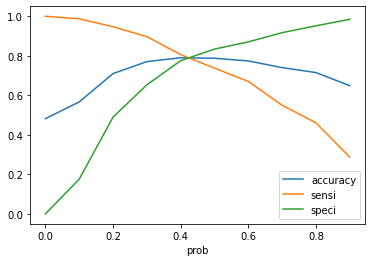

In [102]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.44 is the optimum point to take it as a cutoff probability.

In [103]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_Score,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.318924,32,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.095248,10,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.078552,8,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.390982,39,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.958269,96,1,1,1,1,1,1,1,1,1,1,1,1


In [104]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7910782335799148

In [105]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1863,  449],
       [ 483, 1666]], dtype=int64)

In [106]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [107]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7752442996742671

In [108]:
# Let us calculate specificity
TN / float(TN+FP)

0.8057958477508651

In [109]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.19420415224913495


In [110]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7877068557919622


In [111]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7941176470588235


# Precision and Recall

In [112]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1928,  384],
       [ 564, 1585]], dtype=int64)

##### Precision
TP / TP + FP

In [113]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8049771457592687

##### Recall
TP / TP + FN

In [114]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7375523499302001

In [115]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8049771457592687

In [116]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7375523499302001

### Precision and recall tradeoff

In [117]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    1
 4458    1
 4459    0
 4460    0
 Name: Predicted, Length: 4461, dtype: int64)

In [118]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

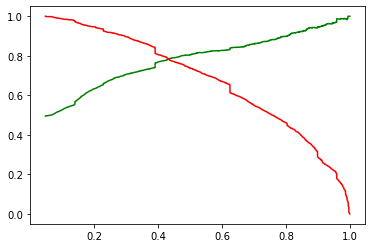

In [119]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Here, threshold value is around 0.44 which is equal to the optimum point of cut of probability. So we are keeping this model

###  Making predictions on the test set

In [120]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head(20)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,...,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4771,-0.902685,-0.955492,-1.044782,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6122,0.866207,-0.838993,1.841743,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9202,0.108111,0.716094,0.604661,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6570,-0.144588,0.564292,0.192300,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2668,1.118906,0.629602,0.604661,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4233,-0.902685,-0.955492,-1.044782,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3368,-0.397287,1.872259,-0.220061,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9091,1.371605,0.675496,0.192300,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5972,-0.397287,-0.831932,-0.220061,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3631,0.360810,1.072652,1.017021,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [121]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Modified,Last Notable Activity_Unreachable,"Specialization_Banking, Investment And Insurance"
4771,-0.955492,1,0,0,0,0,0,1,0,0,0,0,0
6122,-0.838993,0,0,0,0,0,0,0,0,1,0,0,0
9202,0.716094,0,0,0,0,0,0,1,0,1,0,0,0
6570,0.564292,0,0,0,1,0,0,1,0,1,0,0,0
2668,0.629602,0,0,0,0,0,0,1,0,1,1,0,0


In [122]:
#Adding constant
X_test_sm = sm.add_constant(X_test)

In [123]:
#Making prediction
y_test_pred = res.predict(X_test_sm)

In [124]:
y_test_pred[:10]

4771    0.996534
6122    0.150907
9202    0.716190
6570    0.338199
2668    0.514780
4233    0.832849
3368    0.775034
9091    0.482114
5972    0.176696
3631    0.788432
dtype: float64

In [125]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [126]:
# Let's see the head
y_pred_1.head()

,0
4771,0.996534
6122,0.150907
9202,0.716190
6570,0.338199
2668,0.514780


In [127]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [128]:
# Putting LeadID to index
y_test_df['LeadID'] = y_test_df.index

In [129]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [130]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [131]:
y_pred_final.head()

,Converted,LeadID,0
0,1,4771,0.996534
1,0,6122,0.150907
2,0,9202,0.716190
3,1,6570,0.338199
4,1,2668,0.514780


In [132]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [133]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['LeadID','Converted','Conversion_Prob'], axis=1)
y_pred_final['Lead_Score'] = y_pred_final.Conversion_Prob.map( lambda x: round(x*100))

In [134]:
# Let's see the head of y_pred_final
y_pred_final.head()

,LeadID,Converted,Conversion_Prob,Lead_Score
0,4771,1,0.996534,100
1,6122,0,0.150907,15
2,9202,0,0.716190,72
3,6570,1,0.338199,34
4,2668,1,0.514780,51


In [135]:
y_pred_final.shape

(1912, 4)

In [136]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [137]:
y_pred_final.head()

,LeadID,Converted,Conversion_Prob,Lead_Score,final_predicted
0,4771,1,0.996534,100,1
1,6122,0,0.150907,15,0
2,9202,0,0.716190,72,1
3,6570,1,0.338199,34,0
4,2668,1,0.514780,51,1


In [138]:
# Let's check the overall accuracy.
accuracy_score=metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
accuracy_score

0.7866108786610879

In [139]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print(confusion_test)

[[799 197]
 [211 705]]


In [140]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [141]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.769650655021834

In [142]:
# Let us calculate specificity
TN / float(TN+FP)

0.8022088353413654

In [143]:
# Calculate false postive rate - predicting converion when customer does not have converted
print(FP/ float(TN+FP))

0.19779116465863453


In [144]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7815964523281597


In [145]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7910891089108911


In [146]:
#precision
confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])

0.7815964523281597

In [147]:
#recall
confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])

0.769650655021834

In [148]:
#Selecting the coefficients of the selected features from our final model excluding the intercept
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Total Time Spent on Website                         1.09
Lead Origin_Lead Add Form                           4.02
Lead Source_Olark Chat                              1.40
Lead Source_Welingak Website                        2.08
Do Not Email_Yes                                   -1.43
Last Activity_Had a Phone Conversation              2.75
Last Activity_Olark Chat Conversation              -0.60
Last Activity_SMS Sent                              0.95
What is your current occupation_Student            -2.39
What is your current occupation_Unemployed         -2.54
Last Notable Activity_Modified                     -0.77
Last Notable Activity_Unreachable                   2.47
Specialization_Banking, Investment And Insurance    0.58
dtype: float64

In [149]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Total Time Spent on Website                         27.18
Lead Origin_Lead Add Form                          100.00
Lead Source_Olark Chat                              34.76
Lead Source_Welingak Website                        51.82
Do Not Email_Yes                                   -35.58
Last Activity_Had a Phone Conversation              68.43
Last Activity_Olark Chat Conversation              -14.95
Last Activity_SMS Sent                              23.69
What is your current occupation_Student            -59.35
What is your current occupation_Unemployed         -63.17
Last Notable Activity_Modified                     -19.19
Last Notable Activity_Unreachable                   61.46
Specialization_Banking, Investment And Insurance    14.48
dtype: float64

In [150]:
#Sorting the feature variables based on their relative coefficient values
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Total Time Spent on Website                          9
Lead Origin_Lead Add Form                            8
Lead Source_Olark Chat                               4
Lead Source_Welingak Website                        10
Do Not Email_Yes                                     6
Last Activity_Had a Phone Conversation              12
Last Activity_Olark Chat Conversation                7
Last Activity_SMS Sent                               0
What is your current occupation_Student              2
What is your current occupation_Unemployed           3
Last Notable Activity_Modified                      11
Last Notable Activity_Unreachable                    5
Specialization_Banking, Investment And Insurance     1
dtype: int64

<Figure size 864x576 with 0 Axes>

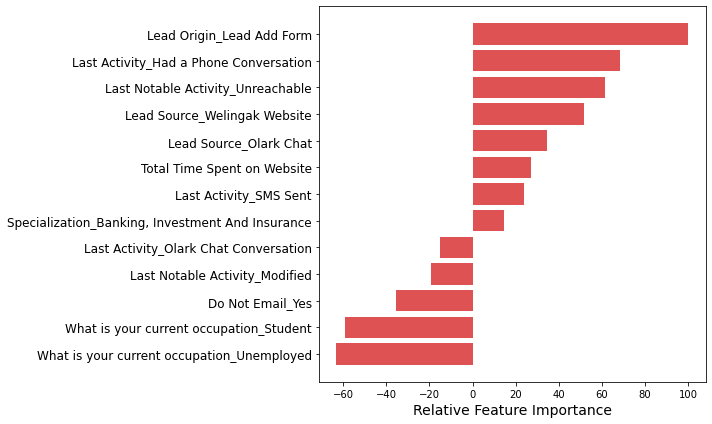

In [151]:
#Plot showing the feature variables based on their relative coefficient values
#Plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize = (12,8))
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:red',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()


### Train Data:

    Accuracy    : 79.11%
    Sensitivity : 77.52%
    Specificity : 80.57%
    
### Test Data:

    Accuracy    : 78.66%
    Sensitivity : 76.96%
    Specificity : 80.22%
